<a href="https://colab.research.google.com/github/saltfish259/Forecast-Facebook-Prophet-Samsung-/blob/main/Forecast_Samsung_(Facebook_Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama**: Razif Zulvikar Hatuwe

## Kaggle Download

1. `import kagglehub` mengimpor modul kagglehub, yang memungkinkan pengguna untuk mengunduh dataset dari Kaggle menggunakan API
2. `path = kagglehub.dataset_download(...)`, fungsi untuk mengunduh versi terbaru dari dataset. hasil unduhan akan di simpan pada variable path.
3. `print("Path to dataset files:", path)` berfungsi untuk melihat lokasi file dataset yang baru saja di unduh.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("caesarmario/samsung-electronics-stock-historical-price")

print("Path to dataset files:", path)

100%|██████████| 36.1k/36.1k [00:00<00:00, 35.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/caesarmario/samsung-electronics-stock-historical-price/versions/845


In [5]:
import pandas as pd
data = pd.read_csv('/root/.cache/kagglehub/datasets/caesarmario/samsung-electronics-stock-historical-price/versions/845/005930.KS.csv')

# EDA

## Library EDA

1. `seasonal_decompose` dari `statsmodels.tsa.seasonal` digunakan untuk melakukan dekomposisi time series menjadi beberapa komponen, yaitu trend, seasonal, residual, dan observed.
2. `matplotlib.pyplot` digunakan untuk membuat grafik sederhana.
3. `seaborn` librari visualisasi data.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

## Struktur Data


`data.head()` untuk menampilkan lima baris pertapa dari data untuk memberikan gambaran awal tentang struktur data dan nilai - nilai data.

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,33287.285156,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,32299.408203,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,32170.554688,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,33287.285156,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,32728.923828,12756554


`data['Date'] = pd.to_datetime(data['Date'])` Mengonversi kolom `Date` menjadi format datetime, sehingga dapat diolah sebagai data waktu dalam analisis time series.

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

`data.info() `Memberikan informasi detail dentang data, termasuk jumlah nilai non-null, tipe data setiap kolom, dan ukuran dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1488 non-null   datetime64[ns]
 1   Open       1488 non-null   float64       
 2   High       1488 non-null   float64       
 3   Low        1488 non-null   float64       
 4   Close      1488 non-null   float64       
 5   Adj Close  1488 non-null   float64       
 6   Volume     1488 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 81.5 KB


`data.tail()` Menampilkan 5 baris terakhir dari data, berguna untuk melihat data terakhir atau memeriksa nilai terbaru dalam time series.

In [10]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1483,2025-01-14,54200.0,54600.0,53700.0,53900.0,53900.0,17465926
1484,2025-01-15,54100.0,54700.0,53500.0,53700.0,53700.0,18625025
1485,2025-01-16,54200.0,55000.0,54100.0,54300.0,54300.0,18627298
1486,2025-01-17,53800.0,54100.0,53200.0,53700.0,53700.0,18805344
1487,2025-01-20,53600.0,53900.0,53300.0,53400.0,53400.0,12857905


`data.describe() ` Memberikan statistik ringkas (Mean, std, min, max, dan kuarting) untuk kolom numerik, membantu memahami distribusi data.

In [11]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1488,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1.488000e+03
mean,2022-01-07 09:41:36.774193152,64270.497312,64847.177419,63661.626344,64220.564516,60402.312405,1.656824e+07
min,2019-01-02 00:00:00,37450.000000,37600.000000,36850.000000,37450.000000,32170.554688,0.000000e+00
25%,2020-07-05 06:00:00,54900.000000,55700.000000,54375.000000,55150.000000,50594.515625,1.117675e+07
50%,2022-01-05 12:00:00,63900.000000,64350.000000,63300.000000,63750.000000,61299.666016,1.475962e+07
75%,2023-07-11 06:00:00,74100.000000,74700.000000,73325.000000,74000.000000,71503.445312,1.988390e+07
max,2025-01-20 00:00:00,90300.000000,96800.000000,89500.000000,91000.000000,87310.109375,9.030618e+07
std,NaN,12290.357942,12344.313812,12198.914420,12250.910119,13043.077957,8.723472e+06


## Data Hilang Atau Null

`data.isnull().sum()` Untuk menghitung jumlai nilai yang hilang (null) disetiap kolom data. Hasilnya adalah jumlah total nilai kosong untuk setiap kolom, yang berguna untuk mengidentifikasi missing values dalam dataseat.

In [12]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [13]:
duplicates = data[data.duplicated()]
print("Jumlah duplikat data:", duplicates.shape[0])
print(duplicates)

Jumlah duplikat data: 0
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [14]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
outliers = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Jumlah outlier di kolom {col}: {outliers[col].shape[0]}")

outliers['Volume']

Jumlah outlier di kolom Open: 0
Jumlah outlier di kolom High: 0
Jumlah outlier di kolom Low: 0
Jumlah outlier di kolom Close: 0
Jumlah outlier di kolom Adj Close: 0
Jumlah outlier di kolom Volume: 65


,Date,Open,High,Low,Close,Adj Close,Volume
293,2020-03-11,54300.0,54400.0,52000.0,52100.0,46083.460938,45707281
295,2020-03-13,47450.0,51600.0,46850.0,49950.0,44181.738281,59462933
296,2020-03-16,50100.0,50900.0,48800.0,48900.0,43252.996094,33339821
297,2020-03-17,46900.0,49650.0,46700.0,47300.0,41837.761719,51218151
298,2020-03-18,47750.0,48350.0,45600.0,45600.0,40334.089844,40152623
...,...,...,...,...,...,...,...
1443,2024-11-14,50200.0,51800.0,49900.0,49900.0,49900.000000,48510715
1444,2024-11-15,50300.0,54200.0,50300.0,53500.0,53500.000000,46774485
1445,2024-11-18,57000.0,57500.0,55900.0,56700.0,56700.000000,48095234
1450,2024-11-25,57400.0,57900.0,56700.0,57900.0,57900.000000,36237325


## Time Series Decomposition

Code ini membantu dalam menganalisis pola musiman, tren, dan sisa error dari data.
1. `seasonal_decompose`, memisahkan data time series menjadi komponen **trend**, **seasonal**(musiman), dan **residual**.
2. `result.plot()`, memvisualisasikan hasil dekomposisi, menampilkan grafik terpisah untuk setiap komponen.
3. `plt.show()`, menampilkan plot dekomposisi secara lengkap.

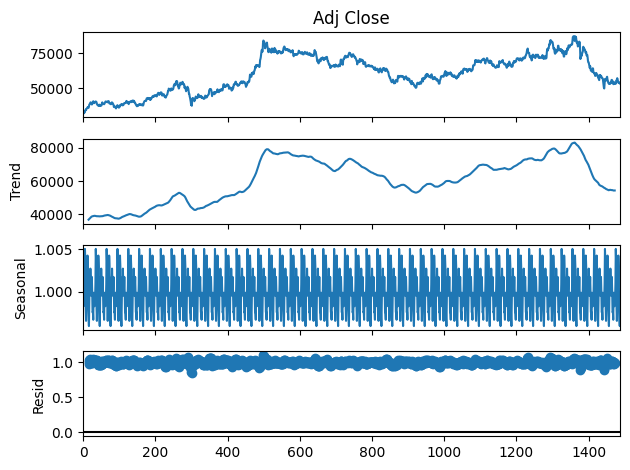

In [15]:
result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=30)
result.plot()
plt.show()

## Visualisasi Data

Grafik ini untuk melihat trend harga Adj Close seiring waktu.
1. `data['Adj Close'].plot(...)`: Memplot harga `Adj Close` untuk melihat perubahan harga dari waktu ke waktu, dengan ukuran gambar yang diatur menjadi 10x6 inci.
2. `title='Adjusted Close Price Over Time'`: Menambahkan judul pada grafik.
3. `plt.xlabel('Date')` dan` plt.ylabel('Adj Close Price')`: Menambahkan label sumbu-x dan sumbu-y untuk konteks yang jelas.
4. `plt.show()`: Menampilkan plot.

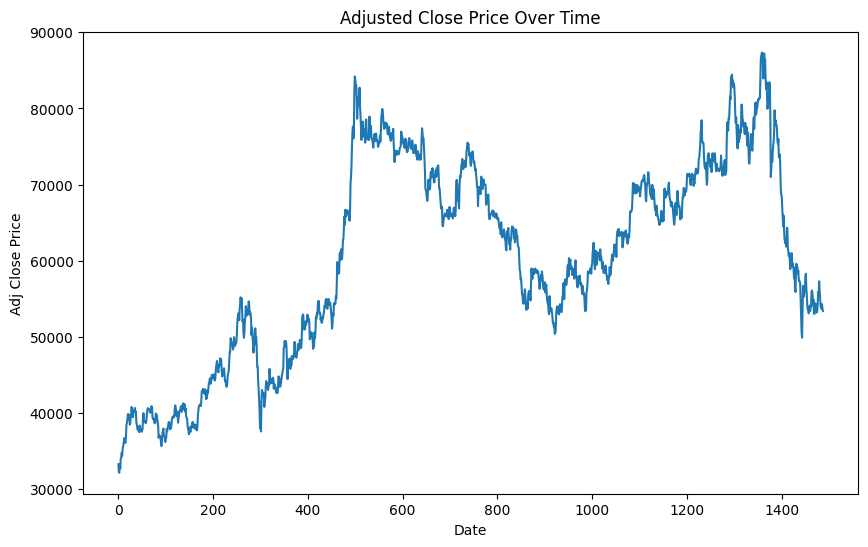

In [16]:
data['Adj Close'].plot(title='Adjusted Close Price Over Time', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

Grafik ini berguna untuk menganalisis tren dan pola dalam volume perdagangan sepanjang waktu.
1. `data['Volume'].plot(...)`: Memplot volume perdagangan untuk melihat perubahan volume dari waktu ke waktu, dengan ukuran gambar diatur menjadi 10x6 inci.
2.` title='Trading Volume Over Time'`: Menambahkan judul pada grafik.
3.` plt.xlabel('Date')` dan `plt.ylabel('Volume')`: Menambahkan label untuk sumbu-x (tanggal) dan sumbu-y (volume) agar lebih mudah dipahami.
4. `plt.show()`: Menampilkan plot.


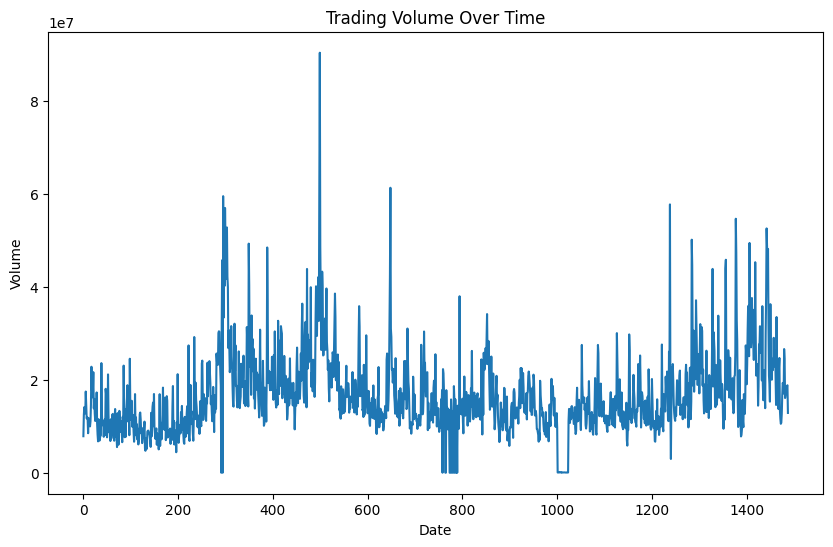

In [17]:
data['Volume'].plot(title='Trading Volume Over Time', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## Korelasi Antar Kolom

Visualisasi ini membantu untuk memahami hubungan antara variabel dalam dataset, mengidentifikasi variabel yang memiliki korelasi tinggi atau rendah.
1. `plt.figure(figsize = (10, 8))`: Menetapkan ukuran gambar untuk grafik menjadi 10x8 inci.
2. `sns.heatmap(data.corr(), annot=True, cmap='coolwarm')`: Membuat heatmap untuk matriks korelasi dari dataset menggunakan seaborn. Parameter:
    - `data.corr()`: Menghitung matriks korelasi antar kolom.
    - `annot=True`: Menampilkan nilai korelasi di atas setiap sel dalam heatmap.
    - `cmap='coolwarm'`: Menentukan skema warna untuk heatmap, dengan warna yang bergradasi dari dingin ke hangat.
3. `plt.title('Correlation Matrix')`: Menambahkan judul pada heatmap.
4. `plt.show()`: Menampilkan heatmap.

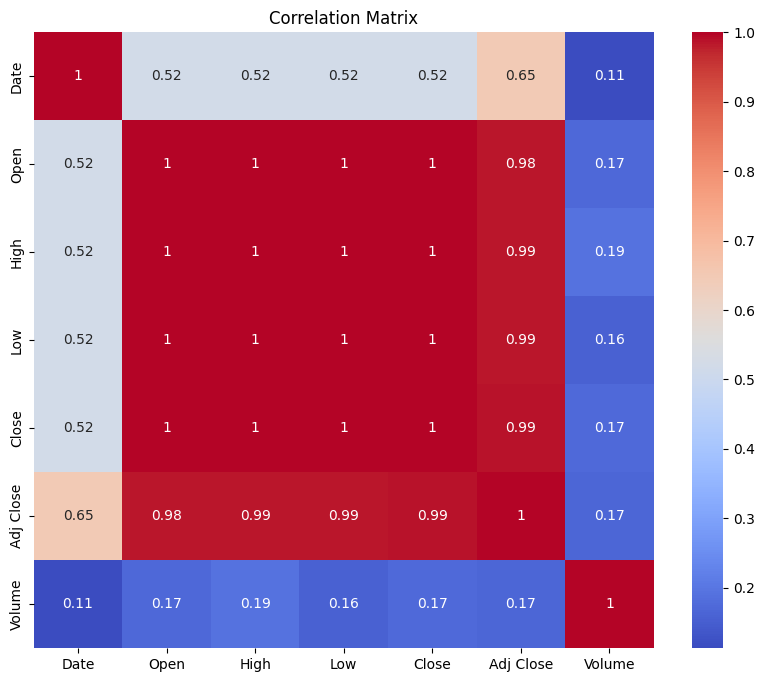

In [18]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Facebook Prophet Forecasting

## Library Forecast

1. `import pandas as pd`: Mengimpor library Pandas, yang digunakan untuk manipulasi dan analisis data, khususnya untuk bekerja dengan DataFrame.
2. `from prophet import Prophet`: Mengimpor model Prophet dari library prophet, yang digunakan untuk melakukan peramalan time series dengan pendekatan yang berbasis pada komponen musiman dan tren.
3. `from sklearn.metrics import mean_absolute_error, mean_squared_error`: Mengimpor metrik dari sklearn untuk mengevaluasi model prediksi.
  - `mean_absolute_error`: Menghitung rata-rata kesalahan absolut antara nilai yang diprediksi dan nilai aktual.
  - `mean_squared_error`: Menghitung rata-rata kesalahan kuadrat antara nilai yang diprediksi dan nilai aktual.
4. `import plotly.express as px`: Mengimpor Plotly Express, library untuk visualisasi data interaktif yang memudahkan pembuatan berbagai jenis grafik.
5. `import numpy as np`: Mengimpor NumPy, library untuk operasi numerik dan manipulasi array, sering digunakan dalam analisis data dan pemrosesan matematis.
6. `import joblib`: Mengimpor Joblib, yang digunakan untuk menyimpan dan memuat model machine learning atau objek Python lainnya, sehingga memudahkan dalam melakukan penyimpanan dan pemulihan model.


In [19]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px
import numpy as np
import joblib

## Data Prep

Dilakukan pembagian data untuk training dan untuk test.
1. `train_data = data[data['Date'] < '2024-09-21']`: Membuat subset train_data yang berisi semua baris dari data di mana kolom Date kurang dari 21 September 2024.
2. `test_data = data[data['Date'] >= '2024-09-21']`: Membuat subset test_data yang berisi semua baris dari data di mana kolom Date sama dengan atau lebih besar dari 21 September 2024.

In [20]:
train_data = data[data['Date'] < '2024-09-25']
test_data = data[data['Date'] >= '2024-09-25']

Penggantian nama kolom agar model prophet dapat mengenali kolom yang berisi tanggal dan nilai yang akan di prediksi.
1. ` train_data = train_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'})`: Mengganti nama kolom `Date` menjadi `ds` dan kolom `Adj Close` menjadi `y` pada dataset pelatihan, sesuai dengan format input yang diperlukan oleh model Prophet.
2. `test_data = test_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'})`: Melakukan hal yang sama untuk dataset pengujian.


In [21]:
train_data = train_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
test_data = test_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

## Model Prophet

Langkah ini mempersiapkan model untuk melakukan prediksi berdasarkan data historis dan variable yang mempengaruhi harganya.
1. `model = Prophet(...)`: Membuat objek model Prophet dengan parameter yang ditentukan:
  - `yearly_seasonality=True`: Mengaktifkan komponen musiman tahunan.
  - `weekly_seasonality=True`: Mengaktifkan komponen musiman mingguan.
  - `daily_seasonality=True`: Mengaktifkan komponen musiman harian.
  - `seasonality_mode='multiplicative'`: Menggunakan model musiman multiplikatif.
  - `changepoint_prior_scale=0.5`: Menentukan kekuatan penyesuaian perubahan tren.
  - `seasonality_prior_scale=0.01`: Menentukan kekuatan penyesuaian komponen musiman.
  - `n_changepoints=30` : Menetapkan hingga 30 titik perubahan untuk menangkap perubahan tren dalam data.
2. `model.add_regressor('Open')`, `model.add_regressor('High')`, `model.add_regressor('Low')`, `model.add_regressor('Close')`: Menambahkan kolom `Open`, `High`, `Low`, dan `Close` sebagai regresor untuk membantu model dalam membuat prediksi lebih akurat berdasarkan variabel-variabel tersebut.
3.` model.fit(train_data[['ds', 'y', 'Open', 'High', 'Low', 'Close']])`: Melatih model menggunakan data pelatihan yang berisi kolom `ds` (tanggal), `y` (nilai yang diprediksi), dan regresor yang telah ditambahkan.

In [22]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=0.01,
    n_changepoints=30
)

model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Close')
model.fit(train_data[['ds', 'y', 'Open', 'High', 'Low', 'Close']])

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt_2pqc1g/4b4g21au.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt_2pqc1g/kglz13sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97728', 'data', 'file=/tmp/tmpt_2pqc1g/4b4g21au.json', 'init=/tmp/tmpt_2pqc1g/kglz13sd.json', 'output', 'file=/tmp/tmpt_2pqc1g/prophet_modele2o7wmlw/prophet_model-20250121034739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Langkah ini memungkikan model untuk menghasilkan prediksi harga berdasarkan data historis dan faktor - faktor yang mempengaruhi harga.
1. `future = model.make_future_dataframe(periods=len(test_data))`: Membuat DataFrame future yang berisi tanggal masa depan berdasarkan jumlah baris dalam `test_data`. Ini menambahkan periode waktu yang diperlukan untuk prediksi ke model.
2. `future = pd.concat([future,data[['Open', 'High', 'Low', 'Close']]], axis=1)`: Menggabungkan DataFrame future dengan kolom `Open`, `High`, `Low`, dan `Close` dari dataset asli. Ini memastikan bahwa semua variabel regresor yang diperlukan untuk prediksi tersedia dalam DataFrame masa depan.
3. `forecast = model.predict(future)`: Menggunakan model Prophet untuk memprediksi nilai masa depan berdasarkan DataFrame `future`, yang sekarang berisi tanggal dan regresor. Hasil prediksi disimpan dalam variabel `forecast`.


In [23]:
future = model.make_future_dataframe(periods=len(test_data))
future = pd.concat([future,data[['Open', 'High', 'Low', 'Close']]], axis=1)
forecast = model.predict(future)

Dengan langkah ini, `forecast_test` siap digunakan untuk membandingkan prediksi dengan nilai aktual dalam data pengujian, sehingga evaluasi model dapat dilakukan.
1. `forecast_test = forecast[-len(test_data):]`: Mengambil bagian akhir dari DataFrame forecast yang sesuai dengan panjang dataset pengujian (`test_data`). Ini memastikan bahwa hanya prediksi yang relevan untuk periode pengujian yang diambil.
2. `forecast_test['ds'] = test_data['ds']`: Menambahkan kolom `ds` (tanggal) dari `test_data` ke `forecast_test`. Hal ini memastikan bahwa DataFrame `forecast_test` sekarang mencakup tanggal yang sesuai untuk setiap prediksi.



In [24]:
forecast_test = forecast[-len(test_data):]
forecast_test['ds'] = test_data['ds']

<ipython-input-24-f5b9271afe73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_test['ds'] = test_data['ds']


## Hasil MAE, RMSE, dan Visual

Langkah ini penting untuk mengevaluasi seberapa baik model dalam memprediksi nilai di dataset pengujian.
1. `mae = mean_absolute_error(test_data['y'], forecast_test['yhat'])`: Menghitung Mean Absolute Error (MAE) antara nilai aktual (`y` dari `test_data`) dan nilai yang diprediksi (`yhat` dari `forecast_test`). MAE memberikan ukuran rata-rata kesalahan absolut dari prediksi.
2.` rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))`: Menghitung Root Mean Squared Error (RMSE) dengan mengambil akar kuadrat dari Mean Squared Error (MSE) antara nilai aktual dan prediksi. RMSE memberikan ukuran kesalahan kuadrat yang lebih sensitif terhadap outlier.
3. `print(f'Prophet with Best Regression and Parameters - MAE: {mae}, RMSE: {rmse}')`: Mencetak hasil MAE dan RMSE, memberikan informasi tentang kinerja model Prophet dengan regresor dan parameter terbaik yang digunakan.

In [25]:
mae = mean_absolute_error(test_data['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))
print(f'Prophet Regression and Parameters - MAE: {mae}, RMSE: {rmse}')

Prophet Regression and Parameters - MAE: 216.34535671479338, RMSE: 239.80971054295503


Visualisasi ini memungkikan perbandingan langsung antara hasil prediksi dan nilai aktual, memberikan gambaran yang jelas tenang kinerja model.
1. `fig = px.line()`: Membuat objek figure baru untuk plot garis.
2. `fig.add_scatter(...)`:
  - Menambahkan garis untuk prediksi (`yhat`) dengan tanggal dari `forecast_test`, diwarnai biru dan diberi label 'Forecast'.
  - Menambahkan garis untuk nilai aktual (`y`) dengan tanggal dari `test_data`, diwarnai hijau dan diberi label 'Actual'.
3. `fig.update_layout(...)`: Mengatur tata letak plot dengan:
  - `title`: Judul plot.
  - `xaxis_title` dan `yaxis_title`: Label untuk sumbu-x (Tanggal) dan sumbu-y (Harga Penutupan yang Disesuaikan).
  - `xaxis_range`: Menentukan rentang sumbu-x dari 21 September 2024 hingga 21 Oktober 2024.
  - `hovermode='x unified'`: Mengatur mode hover untuk menampilkan nilai secara bersamaan saat kursor berada di atas sumbu-x.
4. `fig.show()`: Menampilkan plot interaktif.

In [26]:
fig = px.line()
fig.add_scatter(x=forecast_test['ds'], y=forecast_test['yhat'], mode='lines', name='Forecast', line=dict(color='blue'))
fig.add_scatter(x=test_data['ds'], y=test_data['y'], mode='lines', name='Actual', line=dict(color='green'))
fig.update_layout(title='Prophet with Best Regression and Parameters Forecast vs Actual',
                  xaxis_title='Date',
                  yaxis_title='Adjusted Close Price',
                  xaxis_range=['2024-09-21', '2024-10-21'],
                  hovermode='x unified')
fig.show()

## Menyimpan Model

Menyimpan model ini berguna untuk menghindari proses latihan yang memakan waktu dan memudahkan penggunaan model.
1. `joblib.dump(...)`: Fungsi ini menyimpan objek Python (dalam hal ini, model) ke dalam format file yang efisien, sehingga model dapat dipulihkan (loaded) kembali di lain waktu tanpa perlu melatih ulang.

In [29]:
joblib.dump(model, 'Samsung_Prophet.pkl')

['Samsung_Prophet.pkl']